# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import sleep function from time library
from time import sleep

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={api_key}&units={units}&q="

#lat = []
#lng = []

print("Beginning Data Retrieival")
print("-------------------------")

#print(cities[0])
#response = requests.get(query_url + cities[0]).json()
#print(response)
#lat.append(response['coord']['lat'])
#temp.append(response['main']['temp'])

#from time import sleep
#sleep(0.1)

df_headers = ["city", "cloudiness", "country", "date", "humidity", "lat", "lng", "max_temp", "wind speed"]
df = pd.DataFrame(columns=df_headers)

i = 0
for city in cities:
    response = requests.get(query_url + city).json()
    cod = int(response['cod'])
    #print(cod)
    if cod < 400 : 
        city = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        row_data = [city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed]
        print(row_data)
        df.loc[i] = row_data
        i += 1
    sleep(3)
    
print(df.head())   
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")
#for city in cities:
    

Beginning Data Retrieival
-------------------------
['Punta Arenas', 0, 'CL', 1547326800, 53, -53.16, -70.91, 10, 12.9]
['Ushuaia', 75, 'AR', 1547326800, 81, -54.81, -68.31, 6, 17.5]
['Toora-Khem', 48, 'RU', 1547329104, 69, 52.47, 96.11, -22.34, 1.45]
['Tasiilaq', 8, 'GL', 1547326200, 72, 65.61, -37.64, -9, 2.1]
['Butaritari', 76, 'KI', 1547329089, 100, 3.07, 172.79, 28.51, 4.65]
['Saint-Joseph', 0, 'FR', 1547326800, 80, 43.56, 6.97, 7, 2.1]
['Karaton', 40, 'ID', 1547326800, 88, -6.34, 106.1, 25, 1.5]
['Nome', 1, 'US', 1547327700, 42, 30.04, -94.42, 22.2, 7.7]
['Morro Bay', 75, 'US', 1547326560, 62, 35.37, -120.85, 16.7, 2.1]
['Lebu', 0, 'ET', 1547326800, 29, 8.96, 38.73, 11, 1]
['Ahome', 5, 'MX', 1547325660, 34, 25.92, -109.18, 26, 1.5]
['Virginia', 90, 'US', 1547327700, 92, 47.52, -92.54, -3.1, 1.5]
['Nacala', 68, 'MZ', 1547329139, 96, -14.56, 40.69, 27.39, 6.35]
['Port Alfred', 0, 'ZA', 1547329145, 90, -33.59, 26.89, 20.21, 1.45]
['Cape Town', 40, 'ZA', 1547326800, 68, -33.93, 18.42

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df.to_csv("file_name.csv", encoding='utf-8')
print(len(df['city']))

552


In [50]:
df.head()

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind speed
0,Punta de Bombon,56,PE,1547328232,98,-17.17,-71.79,21.84,5.35
1,Laguna,20,MX,1547325600,36,27.52,-110.01,26.00,2.60
2,Punta Arenas,0,CL,1547326800,53,-53.16,-70.91,10.00,12.90
3,Luyang,8,CN,1547326800,83,31.88,117.26,1.00,1.00
4,Rikitea,76,PF,1547328235,100,-23.12,-134.97,26.09,6.25


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

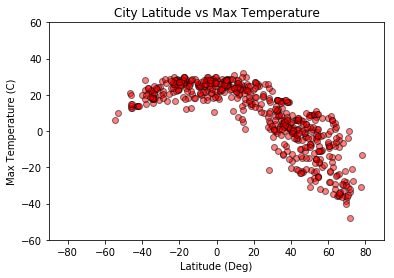

In [12]:
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df['lat']

# Create a random array of data that we will use for our y values
y_axis = df['max_temp']

plt.ylim(-60, 60)
plt.xlim(-90, 90)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude (Deg)")
plt.ylabel("Max Temperature (C)")

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=0.5)
plt.show()

#### Latitude vs. Humidity Plot

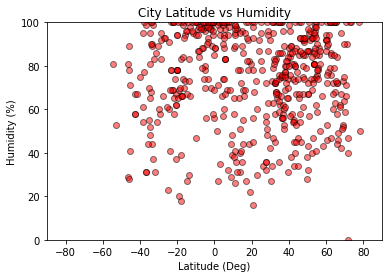

In [14]:
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df['lat']

# Create a random array of data that we will use for our y values
y_axis = df['humidity']

plt.ylim(0,100)
plt.xlim(-90, 90)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude (Deg)")
plt.ylabel("Humidity (%)")

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=0.5)
plt.show()

#### Latitude vs. Cloudiness Plot

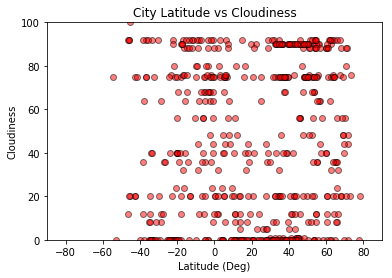

In [15]:
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df['lat']

# Create a random array of data that we will use for our y values
y_axis = df['cloudiness']

plt.ylim(0,100)
plt.xlim(-90, 90)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude (Deg)")
plt.ylabel("Cloudiness")

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=0.5)
plt.show()

#### Latitude vs. Wind Speed Plot

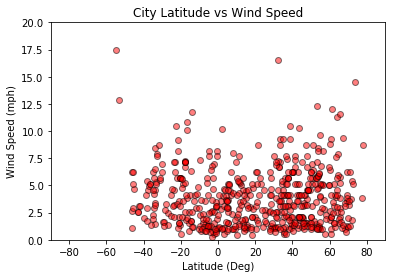

In [18]:
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df['lat']

# Create a random array of data that we will use for our y values
y_axis = df['wind speed']

plt.ylim(0,20)
plt.xlim(-90, 90)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude (Deg)")
plt.ylabel("Wind Speed (mph)")

plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black", alpha=0.5)
plt.show()